In [1]:
# Imprting Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
df_clean = pd.read_csv("data/clean_dataset.csv")
df_business = pd.read_csv('./data/business.csv')
df_business['stop'] = df_business['stop'].str.replace(r'\s+', ' ', regex=True)
df_economy = pd.read_csv('./data/economy.csv')


In [3]:
print(df_clean)


        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

In [4]:
print(df_business)

             date    airline ch_code  num_code dep_time     from time_taken  \
0      11-02-2022  Air India      AI       868    18:00    Delhi    02h 00m   
1      11-02-2022  Air India      AI       624    19:00    Delhi    02h 15m   
2      11-02-2022  Air India      AI       531    20:00    Delhi    24h 45m   
3      11-02-2022  Air India      AI       839    21:25    Delhi    26h 30m   
4      11-02-2022  Air India      AI       544    17:15    Delhi    06h 40m   
...           ...        ...     ...       ...      ...      ...        ...   
93482  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   
93483  31-03-2022    Vistara      UK       826    12:30  Chennai    10h 25m   
93484  31-03-2022    Vistara      UK       832    07:05  Chennai    13h 50m   
93485  31-03-2022    Vistara      UK       828    07:00  Chennai    10h 00m   
93486  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   

            stop arr_time         to   price  
0   

In [5]:
print(df_economy)


              date   airline ch_code  num_code dep_time     from time_taken  \
0       11-02-2022  SpiceJet      SG      8709    18:55    Delhi    02h 10m   
1       11-02-2022  SpiceJet      SG      8157    06:20    Delhi    02h 20m   
2       11-02-2022   AirAsia      I5       764    04:25    Delhi    02h 10m   
3       11-02-2022   Vistara      UK       995    10:20    Delhi    02h 15m   
4       11-02-2022   Vistara      UK       963    08:50    Delhi    02h 20m   
...            ...       ...     ...       ...      ...      ...        ...   
206769  31-03-2022   Vistara      UK       832    07:05  Chennai    13h 50m   
206770  31-03-2022   Vistara      UK       832    07:05  Chennai    13h 50m   
206771  31-03-2022   Vistara      UK       826    12:30  Chennai    20h 35m   
206772  31-03-2022   Vistara      UK       822    09:45  Chennai    23h 20m   
206773  31-03-2022   Vistara      UK       824    20:30  Chennai    24h 25m   

                                                   

In [6]:
# Checking the missing values

print(df_clean.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [7]:
print(df_business.isnull().sum())

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


In [8]:
print(df_economy.isnull().sum())

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


In [9]:
# Removing Unnamed: 0 and flight columns from the clean_dataset

df_clean.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

In [10]:
# Removing num_code column from both df_business and df_economy

df_business.drop(columns=['num_code'], inplace=True)
df_economy.drop(columns=['num_code'], inplace=True)

# Descriptive Analytics

### Clean Dataset

In [11]:
for col in df_clean.columns:
    unique_values = df_clean[col].unique()
    unique_count = len(unique_values)

    if unique_count > 50:
        print(f"{col}: {unique_count} unique values.")
    else:
        print(f"{col}: {unique_values}")


airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class: ['Economy' 'Business']
duration: 476 unique values.
days_left: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
price: 12157 unique values.


In [12]:
df_clean.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [13]:
# Schedule of individual airlines

df_clean['airline'].value_counts().to_frame()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [14]:
# Schedule of individual source city

df_clean['source_city'].value_counts().to_frame()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [15]:
# Schedule of individual departure time
df_clean['departure_time'].value_counts().to_frame()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [16]:
# Schedule of individual stops
df_clean['stops'].value_counts().to_frame()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [17]:
# Schedule of individual arrival time
df_clean['arrival_time'].value_counts().to_frame()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [18]:
# Schedule of individual destination city
df_clean['destination_city'].value_counts().to_frame()


,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [19]:
# Schedule of individual class
df_clean['class'].value_counts().to_frame()

,count
class,
Economy,206666
Business,93487


In [20]:
# Schedule of individual class
df_clean['days_left'].value_counts().to_frame()

,count
days_left,
25,6633
18,6602
39,6593
32,6585
26,6573
24,6542
19,6537
31,6534
33,6532


In [21]:
# Schedule of individual class
df_clean['duration'].value_counts().to_frame()

,count
duration,
2.17,4242
2.25,4036
2.75,2879
2.08,2755
2.83,2323
...,...
37.17,1
38.75,1
38.50,1


## Business Dataset

In [24]:
for col in df_business.columns:
    unique_values = df_business[col].unique()
    unique_count = len(unique_values)

    if unique_count > 50:
        print(f"{col}: {unique_count} unique values.")
    else:
        print(f"{col}: {unique_values}")


date: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']
airline: ['Air India' 'Vistara']
ch_code: ['AI' 'UK']
dep_time: 166 unique values.
from: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
time_taken: 373 unique values.
stop: ['non-stop ' '1-stop ' '1-stop Via IDR ' '1-stop Via IXU '
 '1-stop Via Chennai ' '1-stop Via Lucknow ' '1-stop Via STV '
 '1-stop Via Hyderabad ' '1-stop Vi

In [25]:
# Schedule of individual airlines
df_business['airline'].value_counts().to_frame()

,count
airline,
Vistara,60589
Air India,32898


In [26]:
# Schedule of individual airlines
df_business['ch_code'].value_counts().to_frame()

,count
ch_code,
UK,60589
AI,32898


In [27]:
# Schedule of individual from
df_business['from'].value_counts().to_frame()

,count
from,
Mumbai,19858
Delhi,18316
Bangalore,16441
Kolkata,13473
Hyderabad,12870
Chennai,12529


In [28]:
# Schedule of individual to
df_business['to'].value_counts().to_frame()

,count
to,
Mumbai,18991
Delhi,16707
Bangalore,16198
Kolkata,14758
Hyderabad,13675
Chennai,13158


## Economy Dataset

In [29]:
for col in df_economy.columns:
    unique_values = df_economy[col].unique()
    unique_count = len(unique_values)

    if unique_count > 50:
        print(f"{col}: {unique_count} unique values.")
    else:
        print(f"{col}: {unique_values}")


date: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']
airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
ch_code: ['SG' 'I5' 'UK' 'G8' '6E' 'AI' '2T' 'S5']
dep_time: 251 unique values.
from: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
time_taken: 483 unique values.
stop: ['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t

In [30]:
# Schedule of individual airlines
df_economy['airline'].value_counts().to_frame()

,count
airline,
Vistara,67270
Air India,47996
Indigo,43120
GO FIRST,23177
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


In [31]:
# Schedule of individual ch_code
df_economy['ch_code'].value_counts().to_frame()

,count
ch_code,
UK,67270
AI,47996
6E,43120
G8,23177
I5,16098
SG,9011
S5,61
2T,41


In [32]:
# Schedule of individual from
df_economy['from'].value_counts().to_frame()

,count
from,
Delhi,43029
Mumbai,41045
Bangalore,35665
Kolkata,32874
Hyderabad,27990
Chennai,26171


In [33]:
# Schedule of individual to
df_economy['to'].value_counts().to_frame()

,count
to,
Delhi,40654
Mumbai,40118
Bangalore,34914
Kolkata,34777
Hyderabad,29101
Chennai,27210


# Duplicate Values

In [34]:
# Checking if there are duplicates in table df_clean
df_clean.duplicated().any()

np.True_

In [35]:
df_clean.drop_duplicates()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [37]:
# Checking if there are duplicates in table df_business
df_business.duplicated().any()

np.False_

In [38]:
# Checking if there are duplicates in table df_economy
df_economy.duplicated().any()

np.True_

In [39]:
# Removing duplicates in df_economy (2)
df_economy.drop_duplicates()

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [40]:
# Replace empty strings to NaN
df_clean.replace('', None, inplace=True)

# Checking if df_clean has a NaN values
is_na_df_clean = df_clean.isna().any()
is_na_df_clean

airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [41]:
# Replace empty strings to NaN
df_business.replace('', None, inplace=True)

# Checking if df_business has a NaN values
is_na_df_business = df_business.isna().any()
is_na_df_business

date          False
airline       False
ch_code       False
dep_time      False
from          False
time_taken    False
stop          False
arr_time      False
to            False
price         False
dtype: bool

In [42]:
# Replace empty strings to NaN
df_economy.replace('', None, inplace=True)

# Checking if df_economy has a missing values
is_na_df_economy = df_economy.isna().any()
is_na_df_economy

date          False
airline       False
ch_code       False
dep_time      False
from          False
time_taken    False
stop          False
arr_time      False
to            False
price         False
dtype: bool

# Standardise and Normalize Data

In [43]:
# df_clean columns types                                                                                                             
df_clean_column_types = df_clean.dtypes
df_clean_column_types

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [44]:
# df_business columns types                                                                                                             
df_business_column_types = df_business.dtypes
df_business_column_types

date          object
airline       object
ch_code       object
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [45]:
# df_economy columns types                                                                                                             
df_economy_column_types = df_economy.dtypes
df_economy_column_types

date          object
airline       object
ch_code       object
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [47]:
from scipy.stats import shapiro

# List of columns to check for normal distribution
columns_to_check = ["days_left", "duration", "price"]

for col in columns_to_check:
    stat, p = shapiro(df_clean[col])
    print(f"Column: {col}, Test stat: {stat:.4f}, p-value: {p:.4f}")
    if p > 0.05:
        print(f"The distribution of {col} is close to normal")
    else:
        print(f"The distribution of {col} is not close to normal")
    print()


Column: days_left, Test stat: 0.9593, p-value: 0.0000
The distribution of days_left is not close to normal

Column: duration, Test stat: 0.9564, p-value: 0.0000
The distribution of duration is not close to normal

Column: price, Test stat: 0.7520, p-value: 0.0000
The distribution of price is not close to normal



c:\Users\smaal\Desktop\Data Scinence project\myenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 300153.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# # Changing format 'nnh nnm' (where 'n' is number) to the minutes

def time_taken_to_int(row):
    if row:
        hour_minute = row.split('h')
        if len(hour_minute) == 2:
            hour = hour_minute[0].strip()
            minute = hour_minute[1].replace('m', '').strip()
            if hour.isdigit() and minute.isdigit():
                return int(hour) * 60 + int(minute)
    return None


In [49]:
# Convert price in df_business and df_economy to int

import locale

# Set locale to English for number formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

def convert_price(price):
    return locale.atoi(price)

df_business['price'] = df_business['price'].apply(convert_price)
df_economy['price'] = df_economy['price'].apply(convert_price)


In [ ]:
# Changing time_taken of df_business to the minutes by applying timie_taken function

df_business['time_taken'] = df_business['time_taken'].apply(time_taken_to_int)


In [51]:
# Check if the 'time_taken' column in df_business follows a normal distribution
stat, p = shapiro(df_business["time_taken"])
print(f"Test stat: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("The distribution of time_taken is close to normal")
else:
    print("The distribution of time_taken is not close to normal")


Test stat: 0.9755, p-value: 0.0000
The distribution of time_taken is not close to normal


c:\Users\smaal\Desktop\Data Scinence project\myenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93487.
  res = hypotest_fun_out(*samples, **kwds)


In [52]:
# Changing time_taken of df_business to the minutes by applying timie_taken function

df_economy['time_taken'] = df_economy['time_taken'].apply(time_taken_to_int)


In [53]:
# Remove None rows
df_economy.dropna(subset=['time_taken'], inplace=True)
df_economy.isna().any()

date          False
airline       False
ch_code       False
dep_time      False
from          False
time_taken    False
stop          False
arr_time      False
to            False
price         False
dtype: bool

In [54]:
# Check of duration normal distribution of df_economy

stat, p = shapiro(df_economy["time_taken"])
print(f"Test stat: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("The distribution of time_taken is close to normal")
else:
    print("The distribution of time_taken is not close to normal")


Test stat: 0.9407, p-value: 0.0000
The distribution of time_taken is not close to normal


c:\Users\smaal\Desktop\Data Scinence project\myenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 206770.
  res = hypotest_fun_out(*samples, **kwds)


In [55]:
# Standardize df_clean(duration, days_left and price)

df_clean_numeric = df_clean[["duration", "days_left", "price"]]

df_clean[["duration", "days_left", "price"]] = (df_clean_numeric - df_clean_numeric.mean()) / df_clean_numeric.std()

In [56]:
df_clean


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.386405,-1.843872,-0.657979
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,-0.297695,1.695689,2.131282
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,-0.250420,1.695689,2.476690
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,0.223718,1.695689,2.564540
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,-0.308818,1.695689,2.674067


In [57]:
# Standardize df_business(time_taken)

df_business_numeric = df_business[["time_taken"]]

df_business[["time_taken"]] = (df_business_numeric - df_business_numeric.mean()) / df_business_numeric.std()

In [58]:
df_business


,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,18:00,Delhi,-1.708028,non-stop,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,19:00,Delhi,-1.671545,non-stop,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,20:00,Delhi,1.611939,1-stop,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,21:25,Delhi,1.867321,1-stop,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,17:15,Delhi,-1.027009,1-stop,23:55,Mumbai,46690
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,09:45,Chennai,-0.528406,1-stop,19:50,Hyderabad,69265
93483,31-03-2022,Vistara,UK,12:30,Chennai,-0.479762,1-stop,22:55,Hyderabad,77105
93484,31-03-2022,Vistara,UK,07:05,Chennai,0.018841,1-stop,20:55,Hyderabad,79099
93485,31-03-2022,Vistara,UK,07:00,Chennai,-0.540567,1-stop,17:00,Hyderabad,81585


In [59]:
# Standardize df_economy(time_taken)

df_economy_numeric = df_economy[["time_taken"]]

df_economy[["time_taken"]] = (df_economy_numeric - df_economy_numeric.mean()) / df_economy_numeric.std()

In [60]:
df_economy


,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,-1.295089,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,06:20,Delhi,-1.272076,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,I5,04:25,Delhi,-1.295089,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,UK,10:20,Delhi,-1.283582,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,UK,08:50,Delhi,-1.272076,non-stop,11:10,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7697
206770,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7709
206771,31-03-2022,Vistara,UK,12:30,Chennai,1.247894,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640
206772,31-03-2022,Vistara,UK,09:45,Chennai,1.627615,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640


## Encoding Categorical Variables

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# One-Hot Encode specified columns
df_clean_encoded = pd.get_dummies(df_clean, columns=['airline', 'source_city', 'stops', 'destination_city'], dtype=int)

# Label Encode specified columns
df_clean_encoded['arrival_time'] = label_encoder.fit_transform(df_clean['arrival_time'])
df_clean_encoded['departure_time'] = label_encoder.fit_transform(df_clean['departure_time'])
df_clean_encoded['class'] = label_encoder.fit_transform(df_clean['class'])

print(df_clean_encoded)


        departure_time  arrival_time  class  duration  days_left     price  \
0                    2             5      1 -1.397528  -1.843872 -0.658067   
1                    1             4      1 -1.375282  -1.843872 -0.658067   
2                    1             1      1 -1.397528  -1.843872 -0.657935   
3                    4             0      1 -1.386405  -1.843872 -0.657979   
4                    4             4      1 -1.375282  -1.843872 -0.657979   
...                ...           ...    ...       ...        ...       ...   
300148               4             2      0 -0.297695   1.695689  2.131282   
300149               0             5      0 -0.250420   1.695689  2.476690   
300150               1             5      0  0.223718   1.695689  2.564540   
300151               1             2      0 -0.308818   1.695689  2.674067   
300152               4             2      0 -0.297695   1.695689  2.674067   

        airline_AirAsia  airline_Air_India  airline_GO_FIRST  a

In [62]:
df_business_encoded = pd.get_dummies(df_business, columns=['airline', 'ch_code', 'from', 'stop', 'to'], dtype=int)
df_business_encoded

,date,dep_time,time_taken,arr_time,price,airline_Air India,airline_Vistara,ch_code_AI,ch_code_UK,from_Bangalore,...,stop_1-stop Via Surat,stop_1-stop Via VTZ,stop_2+-stop,stop_non-stop,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,11-02-2022,18:00,-1.708028,20:00,25612,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,11-02-2022,19:00,-1.671545,21:15,25612,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,11-02-2022,20:00,1.611939,20:45,42220,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11-02-2022,21:25,1.867321,23:55,44450,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11-02-2022,17:15,-1.027009,23:55,46690,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,09:45,-0.528406,19:50,69265,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
93483,31-03-2022,12:30,-0.479762,22:55,77105,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
93484,31-03-2022,07:05,0.018841,20:55,79099,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
93485,31-03-2022,07:00,-0.540567,17:00,81585,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df_economy_encoded = pd.get_dummies(df_economy, columns=['airline', 'ch_code', 'from', 'stop', 'to'], dtype=int)
df_economy_encoded

,date,dep_time,time_taken,arr_time,price,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,...,stop_1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t,stop_1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t,stop_2+-stop,stop_non-stop,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,11-02-2022,18:55,-1.295089,21:05,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,11-02-2022,06:20,-1.272076,08:40,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,11-02-2022,04:25,-1.295089,06:35,5956,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,11-02-2022,10:20,-1.283582,12:35,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,11-02-2022,08:50,-1.272076,11:10,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,07:05,0.315850,20:55,7697,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206770,31-03-2022,07:05,0.315850,20:55,7709,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206771,31-03-2022,12:30,1.247894,09:05,8640,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206772,31-03-2022,09:45,1.627615,09:05,8640,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
def remove_outliers_by_iqr(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [65]:
df_clean_encoded = remove_outliers_by_iqr(df_clean_encoded, 'price')
df_clean_encoded

,departure_time,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Mumbai,stops_one,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,2,5,1,-1.397528,-1.843872,-0.658067,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,4,1,-1.375282,-1.843872,-0.658067,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,-1.397528,-1.843872,-0.657935,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,0,1,-1.386405,-1.843872,-0.657979,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,4,1,-1.375282,-1.843872,-0.657979,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,4,2,0,-0.297695,1.695689,2.131282,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300149,0,5,0,-0.250420,1.695689,2.476690,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300150,1,5,0,0.223718,1.695689,2.564540,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300151,1,2,0,-0.308818,1.695689,2.674067,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [66]:
df_business_without_outliers = remove_outliers_by_iqr(df_business, 'price')
df_business_without_outliers

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,18:00,Delhi,-1.708028,non-stop,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,19:00,Delhi,-1.671545,non-stop,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,20:00,Delhi,1.611939,1-stop,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,21:25,Delhi,1.867321,1-stop,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,17:15,Delhi,-1.027009,1-stop,23:55,Mumbai,46690
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,09:45,Chennai,-0.528406,1-stop,19:50,Hyderabad,69265
93483,31-03-2022,Vistara,UK,12:30,Chennai,-0.479762,1-stop,22:55,Hyderabad,77105
93484,31-03-2022,Vistara,UK,07:05,Chennai,0.018841,1-stop,20:55,Hyderabad,79099
93485,31-03-2022,Vistara,UK,07:00,Chennai,-0.540567,1-stop,17:00,Hyderabad,81585


In [67]:
df_economy_without_outliers = remove_outliers_by_iqr(df_economy, 'price')
df_economy_without_outliers

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,-1.295089,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,06:20,Delhi,-1.272076,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,I5,04:25,Delhi,-1.295089,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,UK,10:20,Delhi,-1.283582,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,UK,08:50,Delhi,-1.272076,non-stop,11:10,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7697
206770,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7709
206771,31-03-2022,Vistara,UK,12:30,Chennai,1.247894,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640
206772,31-03-2022,Vistara,UK,09:45,Chennai,1.627615,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640


In [68]:
# Develop new feature price_of_hour_of_flight in df_clean

df_clean["price_of_hour_of_flight"] = df_clean["price"] / df_clean["duration"]

In [69]:
# Create a new column 'price_rating' to describe if the price is above or below the average

average_price = 20889.660523  
df_clean['price_rating'] = np.where(df_clean['price'] > average_price, 'Above average', 'Below average')


In [70]:
# Droping price columns form the dataset 

df_clean_encoded.drop(['price'], axis= 1)


,departure_time,arrival_time,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,source_city_Mumbai,stops_one,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,2,5,1,-1.397528,-1.843872,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,4,1,-1.375282,-1.843872,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,-1.397528,-1.843872,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,0,1,-1.386405,-1.843872,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,4,1,-1.375282,-1.843872,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,4,2,0,-0.297695,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300149,0,5,0,-0.250420,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300150,1,5,0,0.223718,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300151,1,2,0,-0.308818,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [71]:
from sklearn.model_selection import train_test_split as tts


X = df_clean_encoded.drop(['price'], axis= 1)
y = df_clean_encoded['price']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [73]:
from keras.models import Sequential
from keras.layers import Dense

nn = Sequential()
nn.add(Dense(64, input_dim=26, activation='relu'))
nn.add(Dense(1, activation='linear'))  # warstwa wyjściowa z jednym neuronem dla regresji
nn.compile(loss='mean_squared_error', optimizer='adam')
nn.summary()

c:\Users\smaal\Desktop\Data Scinence project\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,793 (7.00 KB)

 Trainable params: 1,793 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

In [75]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

def test_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R2 Score: {r2}")

    # Plot actual vs predicted values
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Real values')
    plt.ylabel('Predicted values')
    plt.show()


7501/7501 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0986
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Mean Squared Error (MSE): 0.043877566020281866
R2 Score: 0.9556934637670992


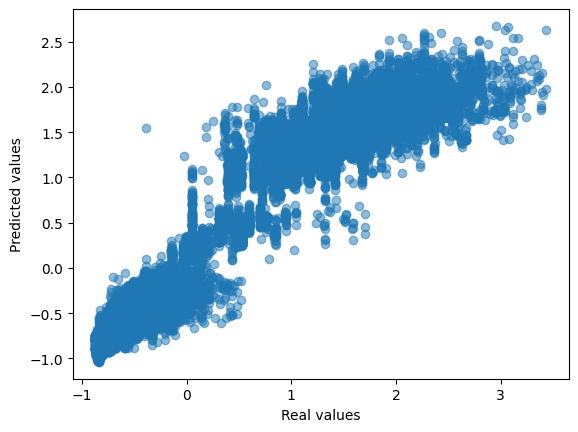

In [76]:
test_model(nn, X_train, y_train, X_test, y_test)
